In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from src.data_cleaning import cleaning_functions as cfs
from src.data_cleaning import create_dfs as cdfs

# More Data Cleaning and Visualisation

In this notebook, I clean the data further, deal with outliers and visualise the data. 

In [5]:
# Look at and clean real property sales data:
rps = pd.read_csv("../data/EXTR_RPSale.csv")

/opt/anaconda3/envs/oy-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [29]:
rps.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,110,08/21/2014,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,664885,40,07/09/1991,0,199203161090,071,001,664885,C,...,3,0,26,N,N,N,N,18,3,11
2,2704079,423943,50,10/11/2014,0,20141205000558,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,403700,715,01/04/2013,0,20130110000910,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,3027422,213043,120,12/20/2019,560000,20191226000848,,,,,...,11,6,3,N,N,N,N,1,8,


In [31]:
# inspect data:
rps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089099 entries, 0 to 2089098
Data columns (total 24 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ExciseTaxNbr        int64 
 1   Major               object
 2   Minor               object
 3   DocumentDate        object
 4   SalePrice           int64 
 5   RecordingNbr        object
 6   Volume              object
 7   Page                object
 8   PlatNbr             object
 9   PlatType            object
 10  PlatLot             object
 11  PlatBlock           object
 12  SellerName          object
 13  BuyerName           object
 14  PropertyType        int64 
 15  PrincipalUse        int64 
 16  SaleInstrument      int64 
 17  AFForestLand        object
 18  AFCurrentUseLand    object
 19  AFNonProfitUse      object
 20  AFHistoricProperty  object
 21  SaleReason          int64 
 22  PropertyClass       int64 
 23  SaleWarning         object
dtypes: int64(7), object(17)
memory usage: 382.5+ MB


Make all column names lower case:

In [6]:
cfs.lower_cols(rps)

,excisetaxnbr,major,minor,documentdate,saleprice,recordingnbr,volume,page,platnbr,plattype,...,propertytype,principaluse,saleinstrument,afforestland,afcurrentuseland,afnonprofituse,afhistoricproperty,salereason,propertyclass,salewarning
0,2687551,138860,110,08/21/2014,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,664885,40,07/09/1991,0,199203161090,071,001,664885,C,...,3,0,26,N,N,N,N,18,3,11
2,2704079,423943,50,10/11/2014,0,20141205000558,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,403700,715,01/04/2013,0,20130110000910,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,3027422,213043,120,12/20/2019,560000,20191226000848,,,,,...,11,6,3,N,N,N,N,1,8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089094,2019480,358650,40,02/04/2004,635100,20040223000241,,,,,...,3,6,3,N,N,N,N,1,8,
2089095,2441236,147157,300,05/10/2010,565000,20100514000554,,,,,...,3,6,3,N,N,N,N,1,8,
2089096,2862289,42106,9058,05/01/2017,0,20170502001588,,,,,...,3,6,15,N,N,N,N,10,8,36 31 51
2089097,2111818,887300,76,03/28/2005,892500,20050331000561,,,,,...,3,6,3,N,N,N,N,1,8,


Change DocumentDate to datetime object:

In [7]:
rps['documentdate'] = pd.to_datetime(rps['documentdate'])

In [34]:
rps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089099 entries, 0 to 2089098
Data columns (total 24 columns):
 #   Column              Dtype         
---  ------              -----         
 0   excisetaxnbr        int64         
 1   major               object        
 2   minor               object        
 3   documentdate        datetime64[ns]
 4   saleprice           int64         
 5   recordingnbr        object        
 6   volume              object        
 7   page                object        
 8   platnbr             object        
 9   plattype            object        
 10  platlot             object        
 11  platblock           object        
 12  sellername          object        
 13  buyername           object        
 14  propertytype        int64         
 15  principaluse        int64         
 16  saleinstrument      int64         
 17  afforestland        object        
 18  afcurrentuseland    object        
 19  afnonprofituse      object        
 20  af

In [35]:
# inspect salewarnings
rps.salewarning.value_counts()

                  1023399
18 31 51           142496
11                  85501
45                  77111
31 51               55579
                   ...   
32 38 46                1
92 60                   1
11 12 31 49             1
15 16 17 31 54          1
15 31 35                1
Name: salewarning, Length: 5428, dtype: int64

There are a lot of categories here that aren't relevant to first time home buyers.  Thus, we drop the following:

In [8]:
cols_to_drop = ['excisetaxnbr', 'recordingnbr', 'volume', 'page', 'platnbr', 'plattype', 'platlot', 
                'platblock', 'sellername', 'buyername', 'afforestland', 'afcurrentuseland', 'afnonprofituse', 'afhistoricproperty']
rps.drop(cols_to_drop, axis = 1, inplace = True)

In [38]:
rps.head()

,major,minor,documentdate,saleprice,propertytype,principaluse,saleinstrument,salereason,propertyclass,salewarning
0,138860,110,2014-08-21,245000,3,6,3,1,8,
1,664885,40,1991-07-09,0,3,0,26,18,3,11
2,423943,50,2014-10-11,0,3,6,15,18,8,18 31 51
3,403700,715,2013-01-04,0,3,6,15,11,8,18 31 38
4,213043,120,2019-12-20,560000,11,6,3,1,8,


In [39]:
rps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089099 entries, 0 to 2089098
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   major           object        
 1   minor           object        
 2   documentdate    datetime64[ns]
 3   saleprice       int64         
 4   propertytype    int64         
 5   principaluse    int64         
 6   saleinstrument  int64         
 7   salereason      int64         
 8   propertyclass   int64         
 9   salewarning     object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 159.4+ MB


Now we can reduce data down to just 2019 data:

In [9]:
rps19 = rps[rps['documentdate'].dt.year == 2019]

In [46]:
rps19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61363 entries, 4 to 2089082
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   major           61363 non-null  object        
 1   minor           61363 non-null  object        
 2   documentdate    61363 non-null  datetime64[ns]
 3   saleprice       61363 non-null  int64         
 4   propertytype    61363 non-null  int64         
 5   principaluse    61363 non-null  int64         
 6   saleinstrument  61363 non-null  int64         
 7   salereason      61363 non-null  int64         
 8   propertyclass   61363 non-null  int64         
 9   salewarning     61363 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 5.1+ MB


We also probably don't care about sale prices that are 0 or below:

In [10]:
rps19 = rps19[rps19['saleprice'] > 0]

In [48]:
rps19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41780 entries, 4 to 2089082
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   major           41780 non-null  object        
 1   minor           41780 non-null  object        
 2   documentdate    41780 non-null  datetime64[ns]
 3   saleprice       41780 non-null  int64         
 4   propertytype    41780 non-null  int64         
 5   principaluse    41780 non-null  int64         
 6   saleinstrument  41780 non-null  int64         
 7   salereason      41780 non-null  int64         
 8   propertyclass   41780 non-null  int64         
 9   salewarning     41780 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 3.5+ MB


We will also need a major_minor identifier so we pad out the major/minor columns and combine them into 1:

In [11]:
cfs.maj_min_index(rps19)

,documentdate,major_minor,saleprice,propertytype,principaluse,saleinstrument,salereason,propertyclass,salewarning
4,2019-12-20,2130430120,560000,11,6,3,1,8,
118,2019-07-08,9197150200,192000,3,2,3,1,3,
144,2019-06-26,8944440200,185000,3,2,3,1,3,
164,2019-07-22,9406520630,435000,11,6,3,1,8,
445,2019-03-28,9376300695,550000,3,6,3,1,8,
...,...,...,...,...,...,...,...,...,...
2089056,2019-08-07,0660002210,41040000,3,7,22,18,2,45
2089057,2019-08-07,0660002225,41040000,3,7,22,18,2,45
2089058,2019-08-07,0660002195,41040000,3,7,22,18,2,45
2089059,2019-08-07,0660002220,41040000,3,7,22,18,2,45


Now we can reduce down to only the relevant property type which we've decided are `[11, 12, 14, 18]` - LOOK UP THE NAMES OF THIS AND WRITE EXPLAINATION OF WHY FOR FINAL NOTBOOK

In [12]:
prop_types = [11, 12, 14, 18]
rps19 = rps19[rps['propertytype'].isin(prop_types)]

<ipython-input-12-03bc90e216d8>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rps19 = rps19[rps['propertytype'].isin(prop_types)]


In [13]:
rps19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21372 entries, 4 to 2089082
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   documentdate    21372 non-null  datetime64[ns]
 1   major_minor     21372 non-null  object        
 2   saleprice       21372 non-null  int64         
 3   propertytype    21372 non-null  int64         
 4   principaluse    21372 non-null  int64         
 5   saleinstrument  21372 non-null  int64         
 6   salereason      21372 non-null  int64         
 7   propertyclass   21372 non-null  int64         
 8   salewarning     21372 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 1.6+ MB


Next, we decided the only principle use entries that were relevant were `[6, 2, 7]` - AGAIN MATCH WITH ACTUAL NAMES

In [16]:
prince_use = [2, 6, 7]
rps19 = rps19[rps['principaluse'].isin(prince_use)]

<ipython-input-16-58d2ea47875b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rps19 = rps19[rps['principaluse'].isin(prince_use)]


In [17]:
rps19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21372 entries, 4 to 2089082
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   documentdate    21372 non-null  datetime64[ns]
 1   major_minor     21372 non-null  object        
 2   saleprice       21372 non-null  int64         
 3   propertytype    21372 non-null  int64         
 4   principaluse    21372 non-null  int64         
 5   saleinstrument  21372 non-null  int64         
 6   salereason      21372 non-null  int64         
 7   propertyclass   21372 non-null  int64         
 8   salewarning     21372 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 1.6+ MB


In [18]:
rps19.principaluse.unique()

array([6, 2, 7])

Similarily, the only property classes we care about are `[8,3,9]`

In [19]:
prop_class = [8,3,9]
rps19 = rps19[rps['propertyclass'].isin(prop_class)]
rps19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21001 entries, 4 to 2089082
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   documentdate    21001 non-null  datetime64[ns]
 1   major_minor     21001 non-null  object        
 2   saleprice       21001 non-null  int64         
 3   propertytype    21001 non-null  int64         
 4   principaluse    21001 non-null  int64         
 5   saleinstrument  21001 non-null  int64         
 6   salereason      21001 non-null  int64         
 7   propertyclass   21001 non-null  int64         
 8   salewarning     21001 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 1.6+ MB


<ipython-input-19-891aca43651c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rps19 = rps19[rps['propertyclass'].isin(prop_class)]


Let's check for duplicates:

In [37]:
rps19.major_minor.value_counts()[rps19.major_minor.value_counts() > 1

8843900445    6
3122069048    4
8847500000    3
1865820170    3
1972202382    3
             ..
9558020530    2
0832700280    2
0829000030    2
5104512160    2
4054540090    2
Name: major_minor, Length: 368, dtype: int64

So we have 368 duplicates

In [39]:
rps19.major_minor.value_counts()[rps19.major_minor.value_counts() > 1].count()

368

In [25]:
# inspect the largest duplicate:
rps19[rps19['major_minor'] == '8843900445']

,documentdate,major_minor,saleprice,propertytype,principaluse,saleinstrument,salereason,propertyclass,salewarning
249613,2019-02-14,8843900445,815000,11,6,3,1,8,
901520,2019-02-14,8843900445,699900,11,6,3,1,8,
1181970,2019-03-01,8843900445,706900,11,6,3,1,8,
1738380,2019-03-21,8843900445,799900,11,6,3,1,8,
1748638,2019-02-15,8843900445,782900,11,6,3,1,8,
1858266,2019-02-14,8843900445,776900,11,6,3,1,8,


#### Load lookup codes

Check values in this table:

In [26]:
codes = pd.read_csv('../data/EXTR_LookUp.csv')

In [27]:
codes.head()

,LUType,LUItem,LUDescription
0,1,1,LAND ONLY ...
1,1,10,Land with new building ...
2,1,11,"Household, single family units ..."
3,1,12,"Multiple family residence (Residential, 2-4 un..."
4,1,13,"Multiple family residence (Residential, 5+ uni..."


In [30]:
# sales instrument has look up code type of 6
codes[(codes['LUType'] == 6) & (codes['LUItem'] == 3)]['LUDescription']

1019    Statutory Warranty Deed                       ...
Name: LUDescription, dtype: object

In [31]:
# look into sale reason:
codes[(codes['LUType'] == 5) & (codes['LUItem'] == 1)]['LUDescription']

945    None                                          ...
Name: LUDescription, dtype: object

No reason for the sale on any of them.  This is kind of weird.  I wonder if the other duplicates are like this and maybe we should just drop them or choose the latest one?

## Let's visualise sale price:

First, let's look at the sales price data:

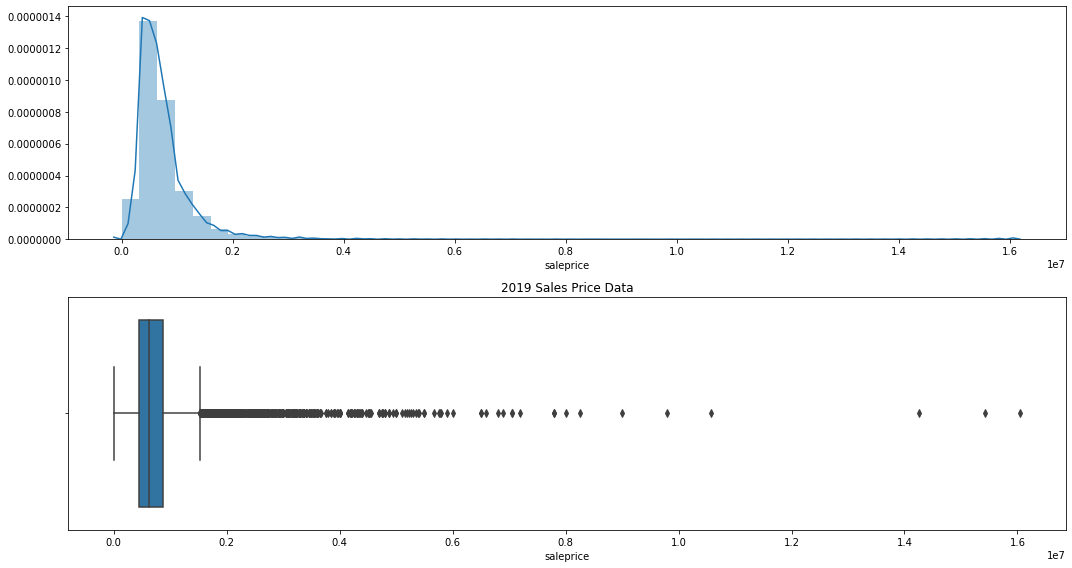

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))
plt.title('2019 Sales Price Data')
sns.distplot(rps19.saleprice, ax = ax[0])
sns.boxplot(rps19.saleprice, ax= ax[1])
plt.tight_layout()

So we can see this data is very skewed - it will be appropriate to look into outliers.

In [47]:
rps19[rps19['saleprice'] > 2000000]

,documentdate,major_minor,saleprice,propertytype,principaluse,saleinstrument,salereason,propertyclass,salewarning
5729,2019-10-23,9323800095,2147000,11,6,3,1,8,
7412,2019-07-18,5021900275,2418000,11,6,3,1,8,
8029,2019-09-20,4389200700,2900000,11,6,3,1,8,
8255,2019-12-02,1336800645,2785000,11,6,3,1,8,
15391,2019-06-12,9502200005,7800000,11,6,3,1,8,
...,...,...,...,...,...,...,...,...,...
2085337,2019-04-30,0333100255,6500000,11,6,3,1,8,
2087470,2019-06-13,0736100175,4775000,11,6,3,1,8,
2088161,2019-01-04,2579500045,4700000,11,6,3,1,8,
2088547,2019-03-26,3262300955,2400000,11,6,3,1,8,


In [48]:
import numpy as np

### Try a log transformation without dropping outliers:

In [50]:
rps19['log_saleprice'] = np.log(rps19['saleprice'])

In [51]:
rps19.head()

,documentdate,major_minor,saleprice,propertytype,principaluse,saleinstrument,salereason,propertyclass,salewarning,log_saleprice
4,2019-12-20,2130430120,560000,11,6,3,1,8,,13.235692
164,2019-07-22,9406520630,435000,11,6,3,1,8,,12.983101
497,2019-12-12,0565250340,311000,14,2,3,1,3,,12.647548
517,2019-02-20,0984000450,409950,11,6,3,1,8,,12.923790
628,2019-03-04,0302000645,380000,11,6,3,1,8,10,12.847927


### Visualise log transformed sale price:

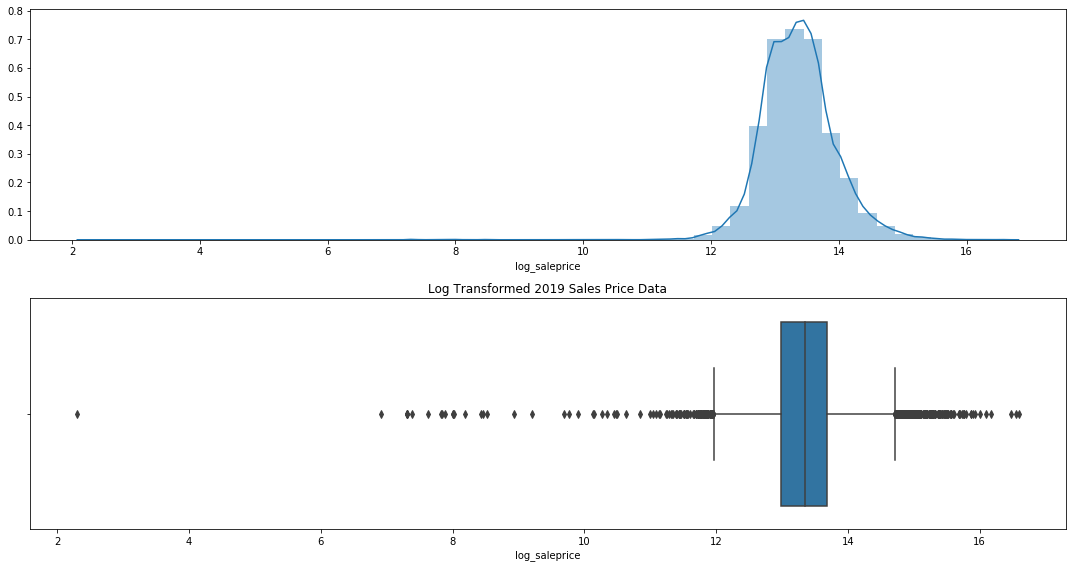

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))
plt.title('Log Transformed 2019 Sales Price Data')
sns.distplot(rps19.log_saleprice, ax = ax[0])
sns.boxplot(rps19.log_saleprice, ax= ax[1])
plt.tight_layout()

Let's try normalising the sales price data using the z-score.

In [55]:
mean_saleprice = rps19['saleprice'].mean()
sd_saleprice = rps19['saleprice'].std()

In [56]:
rps19['z_saleprice'] = (rps19['saleprice'] - mean_saleprice) / sd_saleprice

In [59]:
rps19.head()

,documentdate,major_minor,saleprice,propertytype,principaluse,saleinstrument,salereason,propertyclass,salewarning,log_saleprice,z_saleprice
4,2019-12-20,2130430120,560000,11,6,3,1,8,,13.235692,-0.341827
164,2019-07-22,9406520630,435000,11,6,3,1,8,,12.983101,-0.560974
497,2019-12-12,0565250340,311000,14,2,3,1,3,,12.647548,-0.778368
517,2019-02-20,0984000450,409950,11,6,3,1,8,,12.923790,-0.604891
628,2019-03-04,0302000645,380000,11,6,3,1,8,10,12.847927,-0.657399


In [66]:
rps19[(rps19['z_saleprice'] >= 3) | (rps19['z_saleprice'] <= -3)]

,documentdate,major_minor,saleprice,propertytype,principaluse,saleinstrument,salereason,propertyclass,salewarning,log_saleprice,z_saleprice
8029,2019-09-20,4389200700,2900000,11,6,3,1,8,,14.880221,3.760611
8255,2019-12-02,1336800645,2785000,11,6,3,1,8,,14.839758,3.558996
15391,2019-06-12,9502200005,7800000,11,6,3,1,8,,15.869634,12.351187
23367,2019-09-13,1424200035,3520000,11,6,3,1,8,,15.073972,4.847582
37689,2019-08-30,2954400440,2700000,11,6,3,1,8,,14.808762,3.409976
...,...,...,...,...,...,...,...,...,...,...,...
2083567,2019-11-10,7424700050,2995000,11,6,3,1,8,,14.912455,3.927163
2083951,2019-05-13,2540700300,2645000,11,6,3,1,8,,14.788182,3.313551
2085337,2019-04-30,0333100255,6500000,11,6,3,1,8,,15.687313,10.072055
2087470,2019-06-13,0736100175,4775000,11,6,3,1,8,,15.378905,7.047821


So we have 349 potential outliers - these are all values that lie more than 3 standard deviations away from the mean sales price...

In [77]:
rps19[(rps19['z_saleprice'] <= 3) & (rps19['z_saleprice'] >= -3)].describe()

,saleprice,propertytype,principaluse,saleinstrument,salereason,propertyclass,log_saleprice,z_saleprice
count,2.065200e+04,20652.000000,20652.000000,20652.000000,20652.000000,20652.000000,20652.000000,20652.000000
mean,7.070660e+05,11.329653,5.573213,3.076893,1.004116,7.471722,13.333903,-0.083994
std,3.844781e+05,0.946379,1.235135,1.190366,0.264491,1.547381,0.543955,0.674059
min,1.000000e+01,11.000000,2.000000,2.000000,1.000000,3.000000,2.302585,-1.323589
25%,4.350000e+05,11.000000,6.000000,3.000000,1.000000,8.000000,12.983101,-0.560974
50%,6.200000e+05,11.000000,6.000000,3.000000,1.000000,8.000000,13.337475,-0.236636
75%,8.600000e+05,11.000000,6.000000,3.000000,1.000000,8.000000,13.664688,0.184127
max,2.458000e+06,18.000000,7.000000,26.000000,18.000000,9.000000,14.714859,2.985707


So ignoring rows with sales price outside 3 standard deviations of the mean, our new min, max and mean values are:

mean = $707,066.0

min = $10

max = $2,458,000

In [78]:
rps19 = rps19[(rps19['z_saleprice'] <= 3) & (rps19['z_saleprice'] >= -3)]

In [80]:
rps19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20652 entries, 4 to 2089082
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   documentdate    20652 non-null  datetime64[ns]
 1   major_minor     20652 non-null  object        
 2   saleprice       20652 non-null  int64         
 3   propertytype    20652 non-null  int64         
 4   principaluse    20652 non-null  int64         
 5   saleinstrument  20652 non-null  int64         
 6   salereason      20652 non-null  int64         
 7   propertyclass   20652 non-null  int64         
 8   salewarning     20652 non-null  object        
 9   log_saleprice   20652 non-null  float64       
 10  z_saleprice     20652 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 1.9+ MB


### Visualise sales price again:

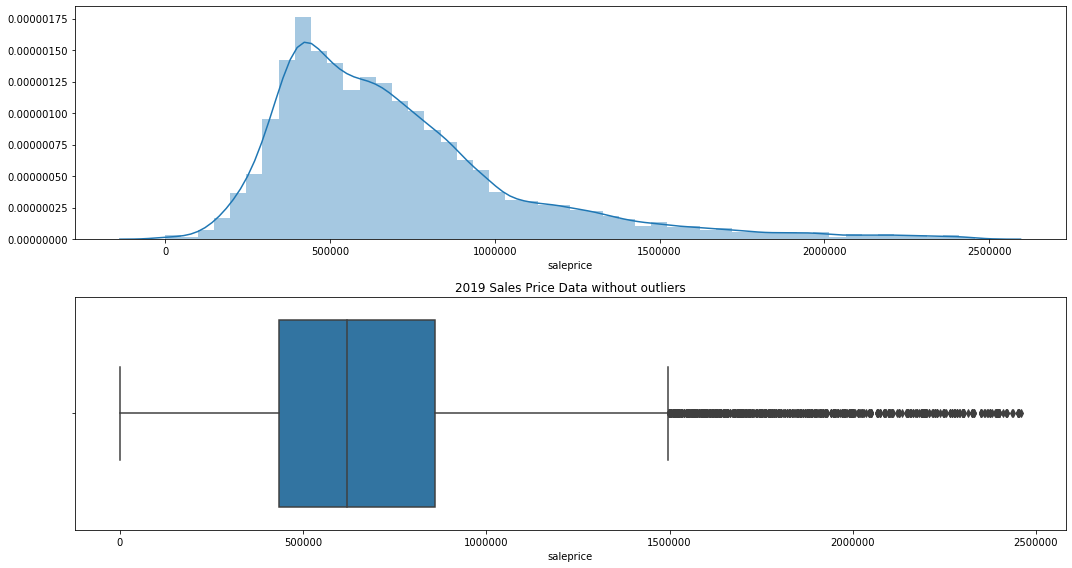

In [82]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))
plt.title('2019 Sales Price Data without outliers')
sns.distplot(rps19.saleprice, ax = ax[0])
sns.boxplot(rps19.saleprice, ax= ax[1])
plt.tight_layout()

In [83]:
rps19.median()

major_minor       3.972900e+09
saleprice         6.200000e+05
propertytype      1.100000e+01
principaluse      6.000000e+00
saleinstrument    3.000000e+00
salereason        1.000000e+00
propertyclass     8.000000e+00
log_saleprice     1.333747e+01
z_saleprice      -2.366358e-01
dtype: float64

In [105]:
rps19.drop_duplicates(subset = 'major_minor', inplace = True)

In [106]:
rps19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20281 entries, 4 to 2089082
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   documentdate    20281 non-null  datetime64[ns]
 1   major_minor     20281 non-null  object        
 2   saleprice       20281 non-null  int64         
 3   propertytype    20281 non-null  int64         
 4   principaluse    20281 non-null  int64         
 5   saleinstrument  20281 non-null  int64         
 6   salereason      20281 non-null  int64         
 7   propertyclass   20281 non-null  int64         
 8   salewarning     20281 non-null  object        
 9   log_saleprice   20281 non-null  float64       
 10  z_saleprice     20281 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 1.9+ MB


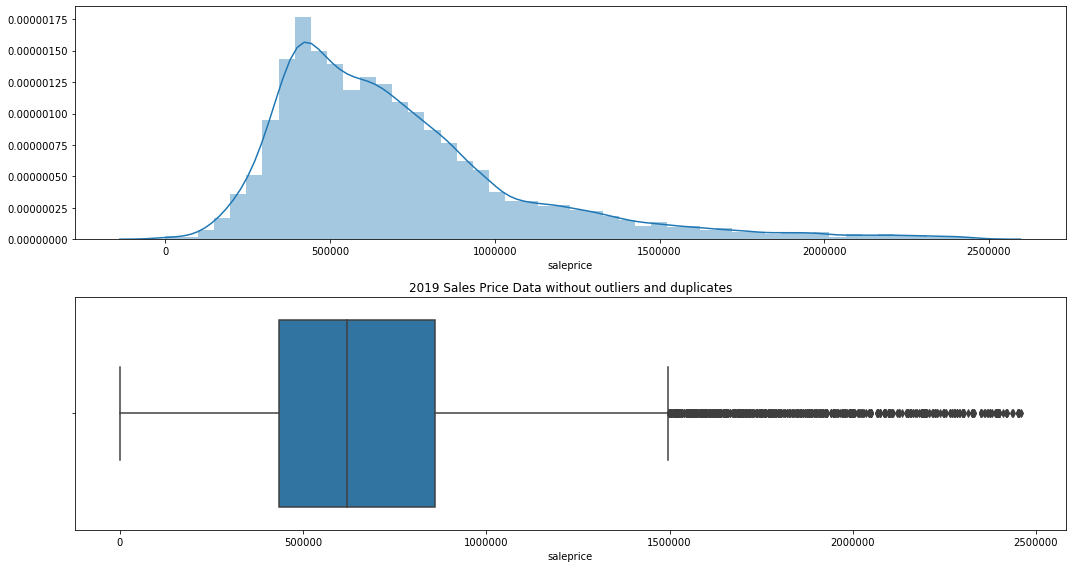

In [108]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))
plt.title('2019 Sales Price Data without outliers and duplicates')
sns.distplot(rps19.saleprice, ax = ax[0])
sns.boxplot(rps19.saleprice, ax= ax[1])
plt.tight_layout()